In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import re
from datetime import datetime
import requests
from bs4 import BeautifulSoup

## *Web Scrapping*
#### Objetivo: generar web scrapping a una pag que contiene los libros de Borges y aplicar técnicas de NLP

In [2]:
#url´s
links = ['https://www.literatura.us/borges/laotra.html',
         'https://www.literatura.us/borges/biografia.html',
         'https://www.literatura.us/borges/escritura.html',
         'https://www.literatura.us/borges/inmortal.html',
        'https://www.literatura.us/borges/teologos.html',
        'https://www.literatura.us/borges/historia.html']

In [6]:
#Realizar función para extraer los cuentos de la pag web
def get_story(url):
    soup = BeautifulSoup(requests.get(url).text,'html.parser')
    cuento = soup.body.find_all('p')[1].text
    return(cuento)

In [5]:
#Imprimir todos los cuentos 
for i in range(len(links)):
    print(get_story(links[i]))
    print('-------------------')

In [7]:
#Guardar los cuentos en una lista 
cuentos = []
for i in range(len(links)):
    cuentos.append(get_story(links[i]))

In [12]:
cuentos_borges = pd.DataFrame({'Cuento': ['La otra muerte', 'Biografia de Tadeo Isidoro Cruz', 'Escritura de Dios', 'El Inmortal', 
                                          'Los teologos', 'Historia del guerrero y la cautiva'], 'Palabras': cuentos})

In [13]:
cuentos_borges

,Cuento,Palabras
0,La otra muerte,Un par de años hará (he perdido\r\n ...
1,Biografia de Tadeo Isidoro Cruz,I'm\r\n looking for the face I had\r\n ...
2,Escritura de Dios,La cárcel es profunda y de piedra;\r\...
3,El Inmortal,Solomon\r\n saith: There is no new ...
4,Los teologos,"Arrasado el jardín, profanados los\r\..."
5,Historia del guerrero y la cautiva,En la página 278 del libro La\r\n ...


In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [15]:
#función que remueva signos
def not_signos(x):
    sub = re.sub('[)x(/,.;:]','',x)
    return(sub)

In [16]:
#lower case
cuentos_borges['Palabras'] = cuentos_borges['Palabras'].apply(lambda x: x.lower())
#Remover los signos
cuentos_borges['Palabras'] = cuentos_borges['Palabras'].apply(lambda x: not_signos(x))
#Tokenizar: separar las palabras y signos. También remueve los \n
cuentos_borges['Palabras'] = cuentos_borges['Palabras'].apply(lambda x: word_tokenize(x))

In [17]:
#Hacer que cada valor de la lista ocupe un lugar
cuentos_borges = cuentos_borges.explode(column='Palabras')
cuentos_borges.head(5)

,Cuento,Palabras
0,La otra muerte,un
0,La otra muerte,par
0,La otra muerte,de
0,La otra muerte,años
0,La otra muerte,hará


In [18]:
#Remover stopwords
stop = stopwords.words('spanish')

In [19]:
#Crear una lista con las plabras de los cuentos que no sean stopwords
cuentos_borges = cuentos_borges[~(cuentos_borges['Palabras'].isin(stop))]
cuentos_borges = cuentos_borges.reset_index()
cuentos_borges = cuentos_borges.drop(columns='index')

In [21]:
cuentos_borges = pd.DataFrame(cuentos_borges.value_counts()).reset_index()
cuentos_borges.columns = ['Cuento','Palabras', 'Repeticiones']

In [83]:
cuentos_borges[0:5]

,Cuento,Palabras,Repeticiones
0,La otra muerte,damián,26
1,Los teologos,aureliano,25
2,Los teologos,juan,23
3,El Inmortal,ciudad,21
4,El Inmortal,hombres,18


In [54]:
#Según los palabras más repetidas se realiza otro filtrado
excluidas = ['damián','aureliano','juan','cruz','hombre','pedro', 'vi', 'dos', 'masoller', 'tan', 'vez', 'después', 'día', 'más', 'si', 'casi']

In [63]:
#Base final
base_final = cuentos_borges[~(cuentos_borges['Palabras'].isin(excluidas))].head(15)

### Gráficar las palabras más repetidas

In [81]:
#Características del titulo
font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 25}

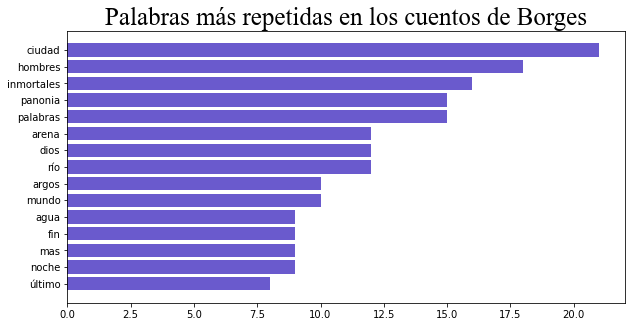

In [82]:
#Plot
fig, ax = plt.subplots(figsize=(10,5))
plt.barh(base_final.iloc[:,1],base_final.iloc[:,2], color = 'slateblue')
plt.plot(ax=ax)
ax.invert_yaxis()
plt.title('Palabras más repetidas en los cuentos de Borges', fontdict=font);